In [395]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

At first
let us have function 2 + x^2^ (or 2 + x^3^)
let us have 5 points, obtained with Gauss noise
let us assume that we have the 10-polynom that generated that 5 points
we construct linear regressions with regularization

The first thing to pay attention: if X_train dots are symmtric then we would be more likely have more plausible picture + coeff^(2k+1) would -> 0
The second thing to pay attention: noise. It dramatically worsens the picture.

In [425]:
train_size = 5

### symmetric X_train
# X_train = np.array(sorted([-2 + i for i in range(train_size)])).reshape(-1, 1)
###

### not symmetric X_train
X_train = np.array(sorted([np.random.uniform(-3, 3) for i in range(train_size)])).reshape(-1, 1)
###

### y_train without noise
# y_train  = np.array([2 + item ** 3  for item in X_train]).reshape(-1, 1)
###

### y_train with noise
y_train  = np.array([2 + item ** 3 + np.random.normal(0, 1)  for item in X_train]).reshape(-1, 1)
###

In [426]:
p_power = 10
pf = PolynomialFeatures(p_power, include_bias=False)
X_train = pf.fit_transform(X_train)
X_train

array([[-1.18408987e+00,  1.40206883e+00, -1.66017551e+00,
         1.96579701e+00, -2.32768033e+00,  2.75618271e+00,
        -3.26356804e+00,  3.86435787e+00, -4.57574702e+00,
         5.41809571e+00],
       [-7.03570752e-01,  4.95011803e-01, -3.48275826e-01,
         2.45036685e-01, -1.72400645e-01,  1.21296051e-01,
        -8.53403539e-02,  6.00429769e-02, -4.22444824e-02,
         2.97219822e-02],
       [ 1.14468502e+00,  1.31030379e+00,  1.49988512e+00,
         1.71689602e+00,  1.96530516e+00,  2.24965537e+00,
         2.57514679e+00,  2.94773196e+00,  3.37422461e+00,
         3.86242435e+00],
       [ 1.72780917e+00,  2.98532451e+00,  5.15807105e+00,
         8.91216244e+00,  1.53985159e+01,  2.66056970e+01,
         4.59695671e+01,  7.94266393e+01,  1.37234075e+02,
         2.37114293e+02],
       [ 2.28759660e+00,  5.23309821e+00,  1.19712177e+01,
         2.73853169e+01,  6.26465579e+01,  1.43310053e+02,
         3.27835590e+02,  7.49955582e+02,  1.71559584e+03,
         3.

In [427]:
def regularization(mod):
    alphas = np.logspace(-7, 2, 11)  # params of regularization
    models = []
    coefs = []
    intercepts = []

    for a in alphas:
        m_r = mod(alpha=a).fit(X_train, y_train)
        models.append(m_r)
        coefs.append(m_r.coef_)
        intercepts.append(m_r.intercept_)

    print('coefs (rows = alfa[i], columns = extention):\n')
    print(pd.DataFrame(np.array(coefs).reshape(len(alphas), p_power)))
    print('\nintercepts:\n')
    print(pd.DataFrame(intercepts))

    return models, alphas

coefs (rows = alfa[i], columns = extention):

           0         1         2         3         4         5         6  \
0   0.395780  0.129639  0.365072  0.173604  0.312200  0.089368  0.141106   
1   0.395780  0.129639  0.365071  0.173604  0.312200  0.089368  0.141106   
2   0.395780  0.129639  0.365071  0.173603  0.312200  0.089368  0.141106   
3   0.395776  0.129638  0.365068  0.173601  0.312198  0.089367  0.141106   
4   0.395749  0.129627  0.365045  0.173586  0.312180  0.089356  0.141103   
5   0.395537  0.129541  0.364863  0.173464  0.312041  0.089269  0.141080   
6   0.393856  0.128862  0.363421  0.172497  0.310945  0.088579  0.140895   
7   0.381044  0.123689  0.352428  0.165137  0.302577  0.083335  0.139480   
8   0.304477  0.093013  0.286580  0.121616  0.252308  0.052741  0.130629   
9   0.128848  0.026847  0.132879  0.030037  0.132342 -0.004310  0.103324   
10  0.031018  0.003154  0.038769  0.004768  0.050434  0.004573  0.065053   

           7         8         9  
0  -0.

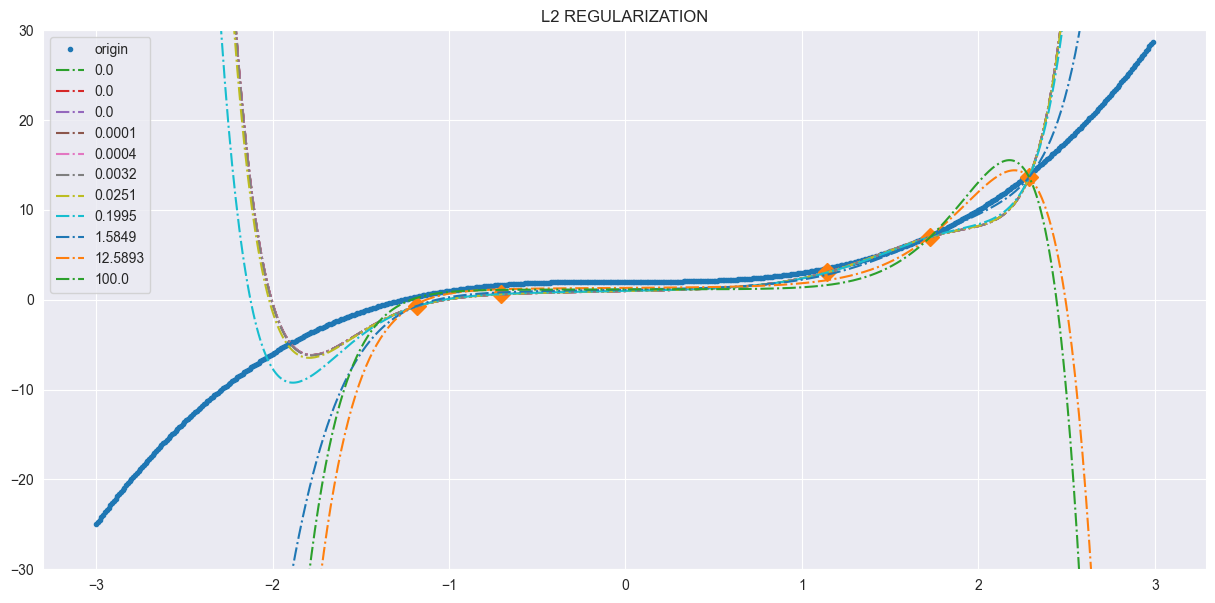

In [428]:
mods, alfs = regularization(Ridge)
x = np.arange(-3, 3, 0.01).reshape(-1, 1)
x_modify = pf.fit_transform(x)
plt.plot(x, 2 + x**3, '.', label='origin')
plt.plot(X_train[:, 0], y_train, 'D', markersize=9)
for i in range(len(mods)):
    plt.plot(x, mods[i].predict(x_modify), '-.', label=round(alfs[i], 4))

plt.title('L2 REGULARIZATION')
plt.ylim(-30, 30)
plt.legend()

coefs (rows = alfa[i], columns = extention):

           0         1         2         3         4         5         6  \
0   0.276481  0.410822  0.920421 -0.117836  0.057080 -0.010799  0.002547   
1   0.276479  0.410803  0.920426 -0.117829  0.057077 -0.010799  0.002547   
2   0.276459  0.410653  0.920466 -0.117777  0.057058 -0.010797  0.002546   
3   0.276394  0.409477  0.920720 -0.117350  0.056904 -0.010778  0.002539   
4   0.275420  0.400172  0.923019 -0.114054  0.055703 -0.010636  0.002485   
5   0.286398  0.171769  0.960219 -0.025377  0.023962 -0.006677  0.001079   
6   0.239454  0.000000  0.987130  0.017306  0.017525  0.000445  0.000000   
7   0.000000  0.000000  0.777935  0.000000  0.160135 -0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.271029  0.000000  0.074432   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.090054   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

           7         8         9  
0  -0.

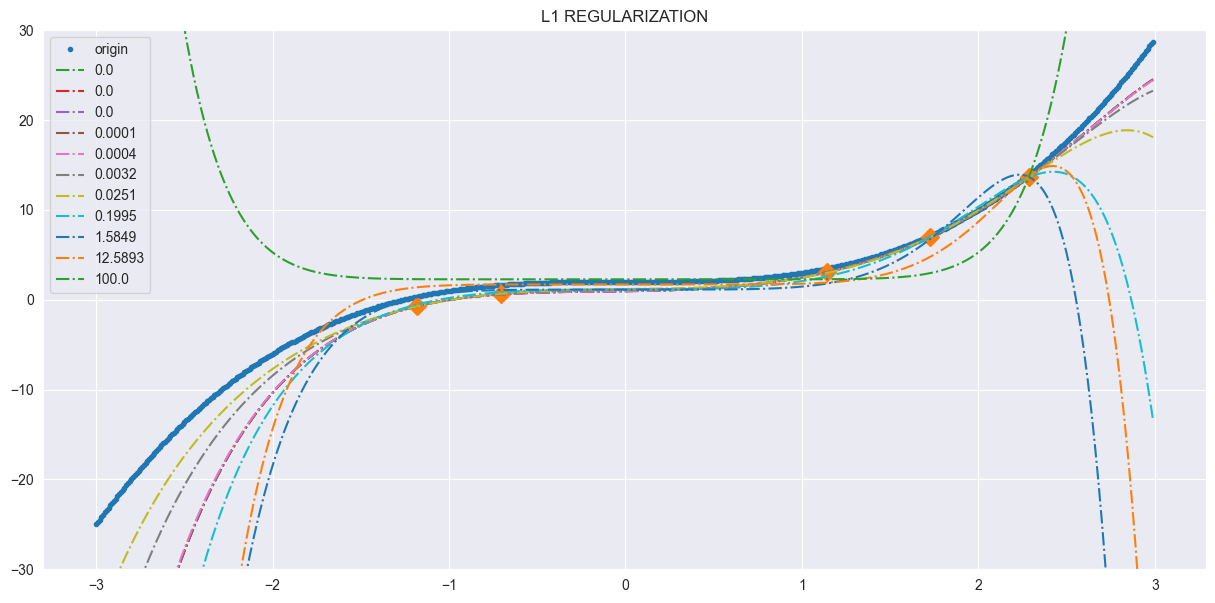

In [429]:
mods, alfs = regularization(Lasso)
x = np.arange(-3, 3, 0.01).reshape(-1, 1)
x_modify = pf.fit_transform(x)
plt.plot(x, 2 + x**3, '.', label='origin')
plt.plot(X_train[:, 0], y_train, 'D', markersize=9)
for i in range(len(mods)):
    plt.plot(x, mods[i].predict(x_modify), '-.', label=round(alfs[i], 4))

plt.title('L1 REGULARIZATION')
plt.ylim(-30, 30)
plt.legend()